<a href="https://colab.research.google.com/github/EMcoding17/ExtraccionConocimientosDeBD/blob/main/Actividad06/RedNeuronal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **RED NERURONAL**
## **Extraccion de conocimientos de base de datos**
## **Romero Sosa Emma Yuridia**
## **IDGS 91**

---



# **Importar librerias**

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
%load_ext tensorboard

# **Cargar Dataset**

In [2]:
#Cargar dataset desde github
!wget https://raw.githubusercontent.com/EMcoding17/ExtraccionConocimientosDeBD/main/Actividad06/grados.csv
df = pd.read_csv("grados.csv",delimiter=',',header='infer')

--2021-12-02 03:08:41--  https://raw.githubusercontent.com/EMcoding17/ExtraccionConocimientosDeBD/main/Actividad06/grados.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4564 (4.5K) [text/plain]
Saving to: ‘grados.csv’

grados.csv          100%[===================>]   4.46K  --.-KB/s    in 0s      

2021-12-02 03:08:41 (43.9 MB/s) - ‘grados.csv’ saved [4564/4564]



In [3]:
#Mostrar la forma del dataframe
df.shape

(499, 2)

In [4]:
#Mostrar los primeros 5 registros
df.head()

,Celsius,Fahrenhiet
0,20,68.0
1,63,145.4
2,65,149.0
3,61,141.8
4,83,181.4


In [5]:
#Mostrar los ultimos 5 registros
df.tail()

,Celsius,Fahrenhiet
494,23,73.4
495,60,140.0
496,92,197.6
497,43,109.4
498,45,113.0


In [6]:
#Mostrar la información del dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499 entries, 0 to 498
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Celsius     499 non-null    int64  
 1   Fahrenhiet  499 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 7.9 KB


In [7]:
#Convertir columna Celsius a float64
df['Celsius'] = df['Celsius'].astype('float64')
#Verificar la información del dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499 entries, 0 to 498
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Celsius     499 non-null    float64
 1   Fahrenhiet  499 non-null    float64
dtypes: float64(2)
memory usage: 7.9 KB


In [8]:
#Mostrar los primeros 5 registros
df.head()

,Celsius,Fahrenhiet
0,20.0,68.0
1,63.0,145.4
2,65.0,149.0
3,61.0,141.8
4,83.0,181.4


In [9]:
#Mostrar los ultimos 5 registros
df.tail()

,Celsius,Fahrenhiet
494,23.0,73.4
495,60.0,140.0
496,92.0,197.6
497,43.0,109.4
498,45.0,113.0


In [10]:
#Obtener la suma de los datos faltantes de cada columna
df.isnull().sum()

Celsius       0
Fahrenhiet    0
dtype: int64

# **Crear una NN**

In [36]:
#Crear capa con una neurona
layer = tf.keras.layers.Dense(units=1, input_shape=[1])
#Crear modelo con capa
model = tf.keras.Sequential([layer])

# **Generar NN**

In [37]:
model.compile(
    optimizer = tf.keras.optimizers.Adam(0.01),
    loss = "mean_squared_error",
    metrics = ["accuracy"]
)

# **Entrenamiento**

In [43]:
# Separar columnas
celsius = df["Celsius"]
fahren= df["Fahrenhiet"]

# Ajustar modelo
history = model.fit(celsius, fahren, epochs=500, verbose=False)

In [44]:
#Verificar disminución en la perdida
perdida = history.history['loss']
print(perdida)

[0.3001297116279602, 0.2884317934513092, 0.2721622884273529, 0.26143234968185425, 0.24810299277305603, 0.23709210753440857, 0.22499980032444, 0.21421599388122559, 0.2032783478498459, 0.19418224692344666, 0.18502357602119446, 0.1758810132741928, 0.1659766584634781, 0.15729226171970367, 0.14957109093666077, 0.14172202348709106, 0.13432402908802032, 0.12717831134796143, 0.12027880549430847, 0.1149020865559578, 0.10781724005937576, 0.1023411899805069, 0.09710050374269485, 0.0920337438583374, 0.08619637787342072, 0.08139047026634216, 0.07719430327415466, 0.07372020184993744, 0.06859365850687027, 0.06430570781230927, 0.06052548065781593, 0.057136282324790955, 0.05412004142999649, 0.05057598277926445, 0.04752494394779205, 0.04467114061117172, 0.04192931577563286, 0.03932281211018562, 0.036926690489053726, 0.03466234728693962, 0.032500721514225006, 0.030595004558563232, 0.02859237976372242, 0.026799391955137253, 0.024872593581676483, 0.023319434374570847, 0.02176458016037941, 0.020333861932158

# **Graficar perdida**

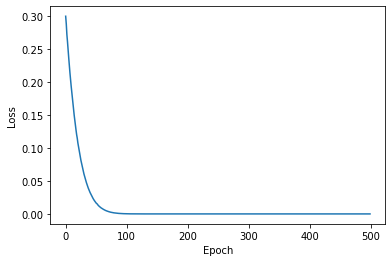

In [45]:
#Asignar etiqueta a X
plt.xlabel("Epoch")
#Asignar etiqueta a Y
plt.ylabel("Loss")
#Graficar
plt.plot(perdida)

# **Predicción**

In [46]:
y_hat = model.predict([150])
y_hat

array([[301.99973]], dtype=float32)